In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb # Import XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# --- 1. Create some complex data ---
np.random.seed(42)
X = np.linspace(-5, 5, 200).reshape(-1, 1)
# A combination of a sine wave and a linear trend
y = X.ravel() * 2 + np.sin(X.ravel() * 2) + np.random.randn(200) * 0.5

In [3]:
X

array([[-5.        ],
       [-4.94974874],
       [-4.89949749],
       [-4.84924623],
       [-4.79899497],
       [-4.74874372],
       [-4.69849246],
       [-4.64824121],
       [-4.59798995],
       [-4.54773869],
       [-4.49748744],
       [-4.44723618],
       [-4.39698492],
       [-4.34673367],
       [-4.29648241],
       [-4.24623116],
       [-4.1959799 ],
       [-4.14572864],
       [-4.09547739],
       [-4.04522613],
       [-3.99497487],
       [-3.94472362],
       [-3.89447236],
       [-3.84422111],
       [-3.79396985],
       [-3.74371859],
       [-3.69346734],
       [-3.64321608],
       [-3.59296482],
       [-3.54271357],
       [-3.49246231],
       [-3.44221106],
       [-3.3919598 ],
       [-3.34170854],
       [-3.29145729],
       [-3.24120603],
       [-3.19095477],
       [-3.14070352],
       [-3.09045226],
       [-3.04020101],
       [-2.98994975],
       [-2.93969849],
       [-2.88944724],
       [-2.83919598],
       [-2.78894472],
       [-2

In [4]:
y

array([ -9.20762181,  -9.51154063,  -9.10960686,  -8.66666802,
        -9.54271948,  -9.54191049,  -8.63516798,  -9.04070893,
        -9.65752416,  -9.14757863,  -9.64337553,  -9.63313423,
        -9.26278626, -10.31795316, -10.19457754,  -9.57660824,
        -9.75712178,  -9.04015762,  -9.58872658,  -9.76877498,
        -8.24789593,  -9.00170655,  -8.75306647,  -9.38714591,
        -8.82495015,  -8.36554725,  -8.85533325,  -7.94180398,
        -8.27127886,  -7.95019019,  -7.93132494,  -6.52394584,
        -7.27073802,  -7.60190436,  -6.46690367,  -7.29074532,
        -6.3760417 ,  -7.25946383,  -6.742895  ,  -5.78057502,
        -5.31200855,  -5.40080803,  -5.35353194,  -5.26035172,
        -5.66889131,  -5.11592526,  -4.81997578,  -3.90269342,
        -4.10957277,  -5.02205688,  -3.84708434,  -4.08000357,
        -4.11421967,  -3.36828996,  -3.06708235,  -3.03539023,
        -3.84889017,  -3.52165144,  -3.14830393,  -2.78170172,
        -3.4726827 ,  -3.29698187,  -3.73508998,  -3.76

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# --- 2. Create and Train the XGBoost Regressor ---
# n_estimators: The number of trees (boosting rounds)
# learning_rate: How much each new tree contributes. A smaller value makes the model more robust.
# max_depth: The maximum depth of each individual tree.
xgbr = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    objective='reg:squarederror', # The loss function for regression
    random_state=42
)

# Train the model
xgbr.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


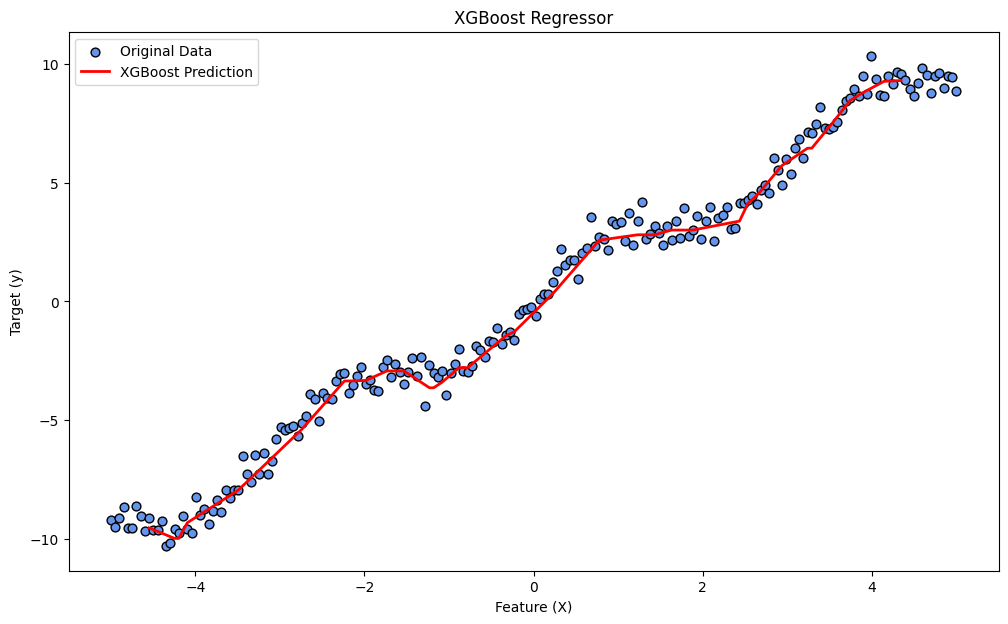

In [7]:
# --- 3. Visualize the results ---
# To plot the model's prediction, we need to sort the test data by its X value
# This is just for visualization purposes to draw a clean line.
sorted_indices = np.argsort(X_test, axis=0).flatten()
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = xgbr.predict(X_test_sorted)

plt.figure(figsize=(12, 7))
# Plot the original data points
plt.scatter(X, y, s=40, edgecolor="black", c="cornflowerblue", label="Original Data")
# Plot the XGBoost prediction line
plt.plot(X_test_sorted, y_pred_sorted, color="red", linewidth=2, label="XGBoost Prediction")

plt.title("XGBoost Regressor")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

In [8]:
# --- 4. Evaluate the Model ---
y_pred_test = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.2699


In [11]:
# from xgboost import plot_importance
# plot_importance(xgbr)
# plt.show()